In [43]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns; sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

In [37]:
faces = fetch_lfw_people(min_faces_per_person=120)
# help(fetch_lfw_people)

In [38]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

model = make_pipeline(pca, svc)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

params_grid = {'svc__C': [1, 5, 10, 50],
               'svc__gamma': [0.0001, 0.0005,0.001, 0.005]}

grid = GridSearchCV(model, params_grid)

%timeit grid.fit(x_train, y_train)
print(f'Grid Params: {grid.best_params_}')

13.1 s ± 918 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Grid Params: {'svc__C': 5, 'svc__gamma': 0.005}


In [40]:
b_model = grid.best_estimator_

y_pred = b_model.predict(x_test)

In [41]:
print(
    classification_report(y_test, y_pred, target_names=faces.target_names)
)

                 precision    recall  f1-score   support

   Colin Powell       0.94      0.84      0.89        58
Donald Rumsfeld       0.89      0.77      0.83        31
  George W Bush       0.90      0.96      0.93       139
     Tony Blair       0.88      0.93      0.90        30

       accuracy                           0.91       258
      macro avg       0.90      0.88      0.89       258
   weighted avg       0.91      0.91      0.91       258



<Axes: >

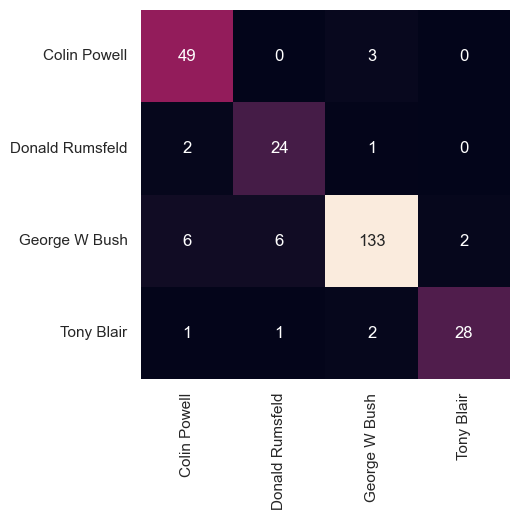

In [42]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,yticklabels=faces.target_names, xticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')